<a href="https://colab.research.google.com/github/plaban1981/NLP-with-Python/blob/master/Deep_Learning_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic Perceptron Model

Artificial neuron - Perceptron

* weights for the input parameters start off as random initially

* Activation Function :

* Bias 

summation ( w(i) * x(i) + bias) where w(i) is the weight for each x(i)

Bias is required in case the inputs to the neural network iiself is 0

##Deep Neural Network:

* Input Layer - Real Values from Data

* Hidden Layers -Layers in between Input and Output Data. 3 or more layers is deep network

* Output Layers - Final estimate of the output.


##Activation Function 

**Z = WX + b**

* Simple Output function 0 / 1

* Sigmoid Function : f(Z) = 0 if Z< 0 
                        = 1 if Z > 0
                    1 /(1 + e ** -Z)

* tanh(Z) hyperbolic tangent function : f(Z) = -1 if Z < 0
                                             =  1 if Z >=0

* RELU (Rectified Linear Unit) : f(Z) = max(0,Z)

**RELU** tends to have best performance in many situations

## Keras Basics

In [0]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
type(iris)

sklearn.utils.Bunch

In [0]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
X = iris.data
X.shape

(150, 4)

In [0]:
y = iris.target

In [0]:
y.shape

(150,)

In [0]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##Convert label into one hot encoding system using Keras builtin categorical function

In [0]:
from keras.utils import to_categorical
y = to_categorical(y)
y.shape

Using TensorFlow backend.


(150, 3)

In [0]:
y[0]

array([1., 0., 0.], dtype=float32)

##Split the data into training and test dataset

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [0]:
X_train.shape,X_test.shape

((100, 4), (50, 4))

##Normalize the features

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [0]:
X_train_scaled

array([[0.41176471, 0.40909091, 0.55357143, 0.5       ],
       [0.97058824, 0.45454545, 0.98214286, 0.83333333],
       [0.38235294, 0.45454545, 0.60714286, 0.58333333],
       [0.23529412, 0.68181818, 0.05357143, 0.04166667],
       [1.        , 0.36363636, 1.        , 0.79166667],
       [0.44117647, 0.31818182, 0.53571429, 0.375     ],
       [0.26470588, 0.63636364, 0.05357143, 0.04166667],
       [0.20588235, 0.68181818, 0.03571429, 0.08333333],
       [0.23529412, 0.81818182, 0.14285714, 0.125     ],
       [0.20588235, 0.        , 0.42857143, 0.375     ],
       [0.58823529, 0.31818182, 0.67857143, 0.70833333],
       [0.14705882, 0.63636364, 0.14285714, 0.04166667],
       [0.20588235, 0.45454545, 0.08928571, 0.04166667],
       [0.23529412, 0.59090909, 0.10714286, 0.16666667],
       [0.38235294, 0.31818182, 0.55357143, 0.5       ],
       [0.23529412, 0.63636364, 0.07142857, 0.04166667],
       [0.41176471, 0.45454545, 0.55357143, 0.45833333],
       [1.        , 0.81818182,

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(8,input_dim=4,activation='relu'))
model.add(Dense(8,input_dim=4,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train_scaled,y_train,epochs=150,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/150





 - 1s - loss: 1.0901 - acc: 0.3100
Epoch 2/150
 - 0s - loss: 1.0858 - acc: 0.3100
Epoch 3/150
 - 0s - loss: 1.0820 - acc: 0.3100
Epoch 4/150
 - 0s - loss: 1.0780 - acc: 0.3100
Epoch 5/150
 - 0s - loss: 1.0740 - acc: 0.3200
Epoch 6/150
 - 0s - loss: 1.0702 - acc: 0.3200
Epoch 7/150
 - 0s - loss: 1.0662 - acc: 0.3200
Epoch 8/150
 - 0s - loss: 1.0621 - acc: 0.3300
Epoch 9/150
 - 0s - loss: 1.0576 - acc: 0.3500
Epoch 10/150
 - 0s - loss: 1.0522 - acc: 0.3800
Epoch 11/150
 - 0s - loss: 1.0468 - acc: 0.4100
Epoch 12/150
 - 0s - loss: 1.0406 - acc: 0.4500
Epoch 13/150
 - 0s - loss: 1.0344 - acc: 0.4900
Epoch 14/150
 - 0s - loss: 1.0283 - acc: 0.5200
Epoch 15/150
 - 0s - loss: 1.0217 - acc: 0.5600
Epoch 16/150
 - 0s - loss: 1.0152 - acc: 0.5800
Epoch 17/150
 - 0s - loss: 1.0089 - acc: 0.5800
Epoch 18/150
 - 0s - loss: 1.0019 - acc: 0.5800
Epoch 19/150
 - 0s - loss: 0.9948 - acc: 0.

In [0]:
y_pred = model.predict_classes(X_test_scaled)

In [0]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [0]:
y_test = y_test.argmax(axis=1)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
0.98


## Visualize Predictions

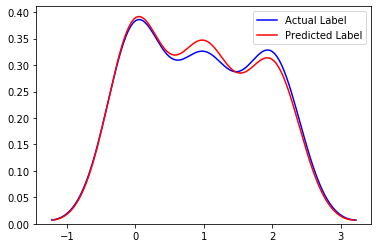

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(y_test,hist=False,label='Actual Label',color='b')
sns.distplot(y_pred,hist=False,label='Predicted Label',color='r')

##Save Model

In [0]:
model.save('FirstKearsmodel.h5')

In [0]:
from keras.models import load_model
my_new_model = load_model('FirstKearsmodel.h5')

##Predict on new unseen data

In [0]:
my_new_model.predict_classes(X_train_scaled)

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

##Recurrent Neural Network

Specifically designed to work with sequence data

* Normal feed forward network :
input --> aggregation --> activation function ---> output

* Recurrent Neural Network :
input --> aggregation --> activation function ---> output ---> feed back to input

* Cells that are a function of inputs from previous time steps are known as memory cells

* RNN are also flexible in their inputs and outputs for both sequences and single vector values.





## LSTMs GRU  and Text Generation

* The issue with RNN is that after a while the network will begin to forget the first input as information is lost at each step  going through the RNN.

The LSTM(Long Term Short Term Memory) helps to address the above issue.


## Text Generation with LSTM using KERAS

* Process Text
* Clean Text
* Tokenize the Text and create Sequences with Keras

In [0]:
def read_files(filepath):
  with open(filepath,'r') as f:
    str_text = f.read()
  return str_text


In [0]:
 text = read_files('/content/moby_dick_four_chapters.txt')

## Tokenize and Clean the text

In [0]:
import spacy
nlp = spacy.load('en',disable=['parser','tagger','ner'])

In [0]:
nlp.max_length = 1198623

## Separate Punctuation

In [0]:
import string
punc_set = list(string.punctuation)

In [0]:
punc_list = punc_set + ["\n","\n\n","\n\n\n","--","\t"]

In [8]:
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '\n',
 '\n\n',
 '\n\n\n',
 '--',
 '\t']

In [0]:
def sep_punc(doc_text):
  return [token.text.lower() for token in nlp(doc_text) if token.text not in punc_list]

In [0]:
d = read_files('/content/moby_dick_four_chapters.txt')

In [0]:
tokens = sep_punc(d)

In [13]:
len(tokens)

11653

##Create Sequence of Tokens

i.e. pass fisrt 24 words of the sequence to the model and predict the 25th word in the sequence.

In [0]:
# organize into sequence of tokens
train_len = 25 + 1 # 25 training words , then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len,len(tokens)):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [65]:
text_sequences[0]

['call',
 'me',
 'ishmael',
 ' ',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me']

In [66]:
text_sequences[1]

['me',
 'ishmael',
 ' ',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little',
 'or',
 'no',
 'money',
 'in',
 'my',
 'purse',
 'and',
 'nothing',
 'particular',
 'to',
 'interest',
 'me',
 'on']

In [0]:
' '.join(text_sequences[0])

'call me ishmael   some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore i thought i would sail about a little and see the watery part of the world   it is a way i have'

In [0]:
len(text_sequences[0])

51

In [68]:
' '.join(text_sequences[1])

'me ishmael   some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on'

In [67]:
' '.join(text_sequences[2])

'ishmael   some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore'

In [0]:
from keras.preprocessing.text import Tokenizer

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)

In [71]:
sequences = tokenizer.texts_to_sequences(text_sequences)
sequences[0]

[956,
 15,
 263,
 4,
 52,
 261,
 408,
 88,
 219,
 130,
 112,
 954,
 260,
 51,
 44,
 39,
 315,
 8,
 24,
 546,
 3,
 150,
 259,
 7,
 2711,
 15]

In [72]:
for i in sequences[0]:
  print(f"{i}:{tokenizer.index_word[i]}")

956:call
15:me
263:ishmael
4: 
52:some
261:years
408:ago
88:never
219:mind
130:how
112:long
954:precisely
260:having
51:little
44:or
39:no
315:money
8:in
24:my
546:purse
3:and
150:nothing
259:particular
7:to
2711:interest
15:me


In [73]:
len(tokenizer.word_counts)

2717

In [0]:
vocabulary_size = len(tokenizer.word_counts)

In [75]:
vocabulary_size

2717

## Convert the text sequences into a matrix

In [0]:
import numpy as np
sequences = np.array(sequences)

In [77]:
sequences

array([[ 956,   15,  263, ...,    7, 2711,   15],
       [  15,  263,    4, ..., 2711,   15,   25],
       [ 263,    4,   52, ...,   15,   25,  957],
       ...,
       [ 952,   13,  166, ...,  262,   54,    2],
       [  13,  166, 2712, ...,   54,    2, 2717],
       [ 166, 2712,    3, ...,    2, 2717,   27]])

In [78]:
sequences.shape

(11627, 26)

#### label is the 51st column

##Split the data into features and labels

X = First n words of Sequence

Y = Next word after Sequence (Label)

In [79]:
from keras.utils import to_categorical
sequences[:,:-1]

array([[ 956,   15,  263, ...,  259,    7, 2711],
       [  15,  263,    4, ...,    7, 2711,   15],
       [ 263,    4,   52, ..., 2711,   15,   25],
       ...,
       [ 952,   13,  166, ...,   12,  262,   54],
       [  13,  166, 2712, ...,  262,   54,    2],
       [ 166, 2712,    3, ...,   54,    2, 2717]])

In [0]:
X = sequences[:,:-1]

In [0]:
Y = sequences[:,-1]

In [0]:
vocabulary_size = len(tokenizer.word_counts)

In [0]:
Y = to_categorical(Y,num_classes=vocabulary_size + 1)

In [84]:
X.shape

(11627, 25)

In [0]:
seq_len = X.shape[1]

##Create the Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding


In [0]:
def create_model(vocabulary_size,seq_len):
  model = Sequential()
  model.add(Embedding(input_dim=vocabulary_size,output_dim=seq_len,input_length=seq_len))
  model.add(LSTM(units=seq_len**2,return_sequences=True))
  model.add(LSTM(units=150))
  model.add(Dense(150,activation='relu'))
  model.add(Dense(vocabulary_size,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  return model

In [44]:
lstm_model = create_model(vocabulary_size + 1,seq_len)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 50)            135900    
_________________________________________________________________
lstm_5 (LSTM)                (None, 50, 2500)          25510000  
_________________________________________________________________
lstm_6 (LSTM)                (None, 150)               1590600   
_________________________________________________________________
dense_5 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_6 (Dense)              (None, 2718)              410418    
Total params: 27,669,568
Trainable params: 27,669,568
Non-trainable params: 0
_________________________________________________________________


In [0]:
from pickle import dump,load

##Fit the Model

In [45]:
lstm_model.fit(X,Y,batch_size=128,epochs=3,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/3





11602/11602 [==============================] - 50s 4ms/step - loss: 6.7525 - acc: 0.0475
Epoch 2/3
11602/11602 [==============================] - 30s 3ms/step - loss: 6.3330 - acc: 0.0514
Epoch 3/3
11602/11602 [==============================] - 30s 3ms/step - loss: 6.3163 - acc: 0.0514


## Train atleast fr 200 epochs

In [0]:
lstm_model.save('lstmmodel.h5')

In [0]:
dump(tokenizer,open('lstmtokenizer','wb'))

##Genearte new text

In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
def generate_text(model,tokenizer,seq_len,seed_text,num_gen_words):#seed_text = sample text
  output_text = []
  input_text = seed_text
  for i in range(num_gen_words):
    encoded_text = tokenizer.texts_to_sequences([input_text])[0]
    pad_encoded = pad_sequences([encoded_text],maxlen=seq_len,truncating='pre') #pad sequences to same length
    pred_word_index = model.predict_classes(pad_encoded,verbose=0)[0]
    pred_word = tokenizer.index_word[pred_word_index]

    input_text = input_text + " " + pred_word
    output_text.append(pred_word)
  return ' '.join(output_text)

In [0]:
import random
seq = random.randint(0,len(text_sequences))
seed_text = " ".join(text_sequences[seq])

In [59]:
seed_text 

'with halting steps i paced the streets and passed the sign of the crossed harpoons"--but it looked too expensive and jolly there further on from the bright red windows of the sword fish inn there came such fervent rays that it seemed to have melted the packed snow and ice from'

In [0]:
next_words = generate_text(lstm_model,tokenizer,seq_len,seed_text,10)

In [61]:
next_words

'the the the the the the the the the the'

##Load Pretrained Model trained with 200 epochs

In [0]:
from keras.models import load_model
model = load_model('/content/epochBIG.h5')
tokenizer = load(open('/content/epochBIG','rb'))

next_words = generate_text(model,tokenizer,seq_len,seed_text,25)

## The next sent of 25 words predicted by the model.

In [87]:
next_words

'twenty primary four or more honourable plight and at the slightest sullen sun to pick town the soot of old land smote a perilous wondrous'